# BDP - Assignment 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from IPython.core.display import display, HTML
from IPython.display import IFrame
import gmplot
from wordcloud import WordCloud, STOPWORDS
import networkx as nx
from networkx import *
%matplotlib inline

# PART 1: Baltimore dataset

In [5]:
# Load the dataset into pandas dataframe.
df = pd.read_csv("baltimore_crimes.csv")
df.info()

FileNotFoundError: [Errno 2] File b'baltimore_crimes.csv' does not exist: b'baltimore_crimes.csv'

In [6]:
df.head()

NameError: name 'df' is not defined

#### 1. Plot frequency of crime incidents across all districts. Which district has the most number of incidents? Which has the least?

In [5]:
df['Description'].unique()

array(['AGG. ASSAULT', 'LARCENY', 'LARCENY FROM AUTO', 'COMMON ASSAULT',
       'AUTO THEFT', 'BURGLARY', 'ROBBERY - RESIDENCE',
       'ROBBERY - STREET', 'ASSAULT BY THREAT', 'ROBBERY - COMMERCIAL',
       'RAPE', 'HOMICIDE', 'SHOOTING', 'ARSON', 'ROBBERY - CARJACKING'],
      dtype=object)

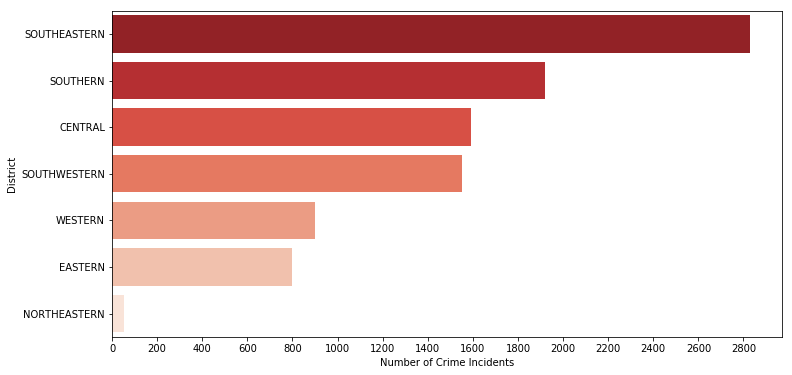

In [11]:
width=12
height=6
figure(figsize=(width,height))
descending_order = df['District'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(data=df,y='District',order=descending_order, palette="Reds_r")
ax.set_xlabel("Number of Crime Incidents")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 200))
plt.show()

### Observations:

* **South Eastern** district has the **highest** number of crime incidents, around 3000.
* **North Eastern** district has the **lowest** number of crime incidents, about 50.

#### 2. Generate a heatmap of the crimes committed. Are the crimes spread evenly across the city, i.e., do incidents occur with same frequency all across the city?

In [17]:
data= df['Location 1'].str.strip('()')
location_df = pd.DataFrame(data.str.split(',',1).tolist(), columns = ['longitude','latitude'])
min_long = float(location_df['longitude'].min())
max_lat = float(location_df['latitude'].max())

location_df = location_df.apply(pd.to_numeric, errors='coerce')
longitudes = location_df['longitude'].values
latitudes = location_df['latitude'].values



gmap = gmplot.GoogleMapPlotter(min_long, max_lat,10)
gmap.heatmap(longitudes, latitudes)
# # Draw
gmap.draw("crime_heatmap.html")
html=HTML( filename='crime_heatmap.html')
IFrame("crime_heatmap.html",width=800,height=500)

#### 3. Generate two plots - Frequency of crime vs day of the week, and frequency of crime vs time of day.

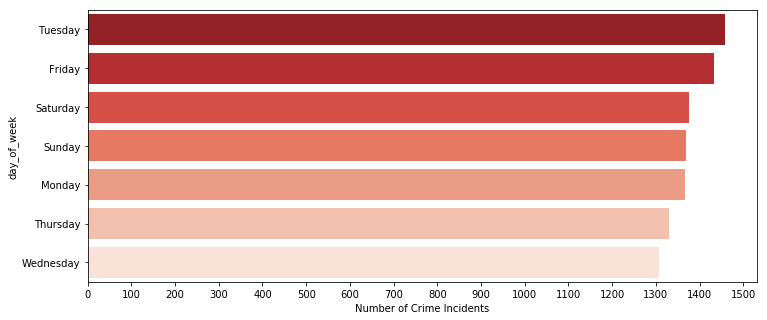

In [18]:
#df['dateOfCrime'] = pd.to_datetime(df['CrimeDate'])
df['day_of_week'] = pd.to_datetime(df['CrimeDate']).dt.day_name()
width=12
height=5
figure(figsize=(width,height))
descending_order = df['day_of_week'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(data=df,y='day_of_week',order=descending_order, palette="Reds_r")
ax.set_xlabel("Number of Crime Incidents")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 100))
plt.show()

#### Observations:

* **Maximum** crimes occur on a **Tuesday**, followed by **Friday**.
* **Minimum** crimes occur on a **Wednesday**.

#### Frequency of crime vs time of day

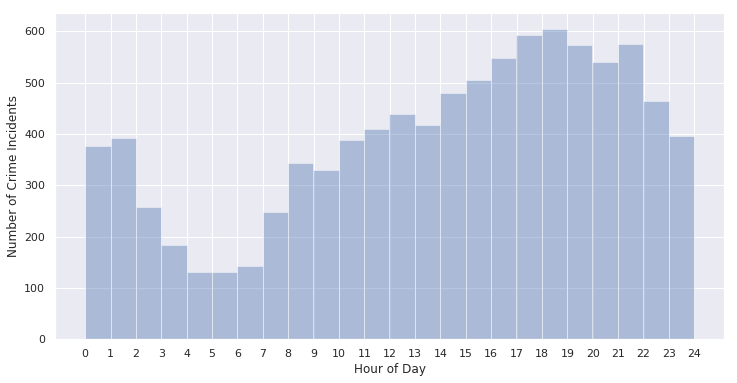

In [19]:
time_list = []
for time in df['CrimeTime']:
    t = time.split(':')
    if len(t) == 1:
        continue
    else:
        t_in_mins = (int(t[0]))+(int(t[1])/60)+(int(t[2])/3660)
        time_list.append(t_in_mins)


# min_time = min(time_to_plot)
# max_time = max(time_to_plot)
# bandwidth = (max_time - min_time)/24
time_to_plot = np.array(time_list)
width=12
height=6
plt.close()
sns.set()
crimes = df['Description'].values
figure(figsize=(width,height))
ax = sns.distplot(time_to_plot,kde=False, bins=24)
ax.xaxis.set_ticks(np.arange(0,25,1))
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Crime Incidents")
plt.show()

#### Observation:

* Most crimes occur between **1800 hours** and **1900 hours**.

#### Which crime is most likely to occur between 2000 Hrs and 2359 Hrs

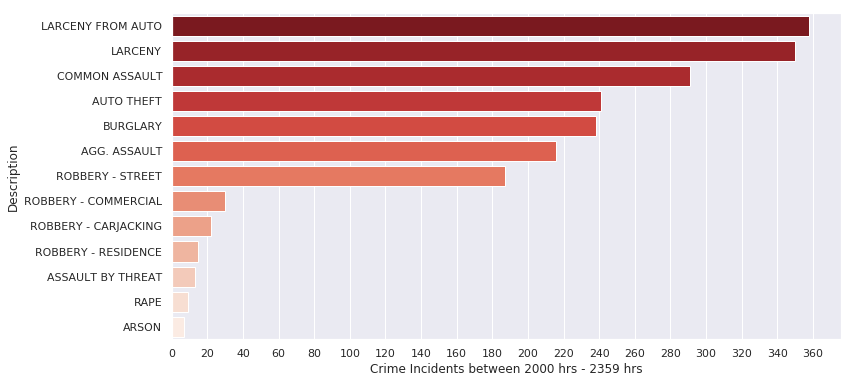

In [20]:
mins=[]
for time in df['CrimeTime']:
    t = time.split(':')
    if len(t) ==1:
        mins.append(0)
    else:
        t_in_mins = (int(t[0])*60)+(int(t[1]))+(int(t[2])/3600)
        mins.append(t_in_mins)

np_mins = np.array(mins)
df['crimeTimeInMins'] = np_mins
night_df = df.loc[ (df['crimeTimeInMins']>=1200) & (df['crimeTimeInMins']<=1440)]

width=12
height=6
figure(figsize=(width,height))
descending_order = night_df['Description'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(data=night_df,y='Description',order=descending_order, palette="Reds_r")
ax.set_xlabel("Crime Incidents between 2000 hrs - 2359 hrs")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 20))
plt.show()

#### Observation:

* **Larceny from Auto** is the most frequent crime between 2000 hours and 2359 hours.

#### 4. Using a frequency vs crime plot, extrapolate what crime is the most common?

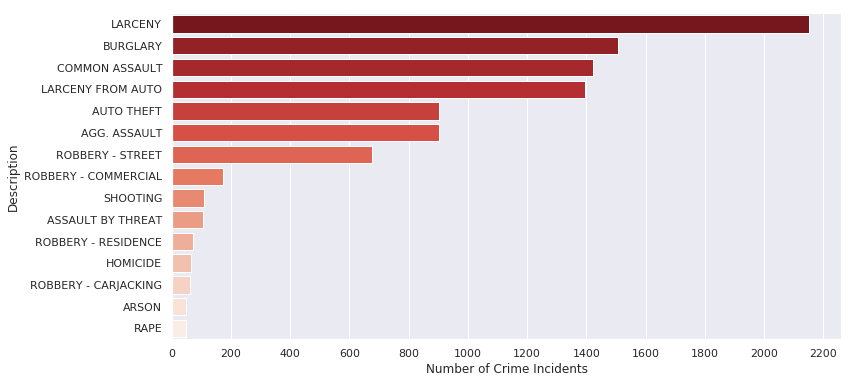

In [21]:
width=12
height=6
figure(figsize=(width,height))
descending_order = df['Description'].value_counts().sort_values(ascending=False).index
ax = sns.countplot(data=df,y='Description',order=descending_order, palette="Reds_r")
ax.set_xlabel("Number of Crime Incidents")
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 200))
plt.show()

#### Observations:

* **Larceny** is the most common crime, followed by **Burglary**.
* **Rape** is least frequent crime.

#### Using most_frequent_crime vs time - find approximately what time of the day does it occur most often

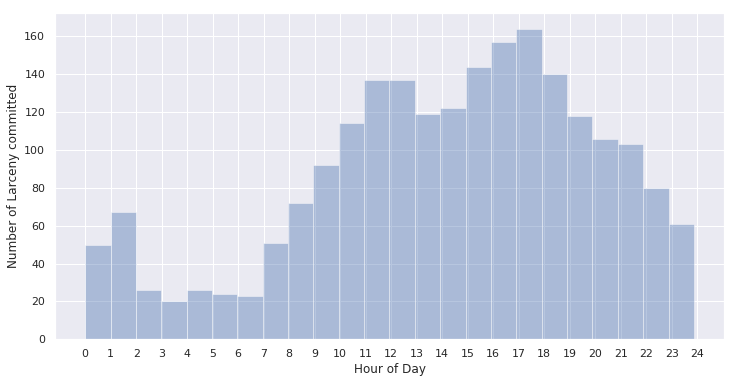

In [22]:
larceny_df = df.loc[df['Description']=='LARCENY']
larceny_df
time_to_plot = larceny_df['crimeTimeInMins'].values
time_to_plot = time_to_plot/60

width=12
height=6
plt.close()
sns.set()
figure(figsize=(width,height))
ax = sns.distplot(time_to_plot,kde=False,bins=24)
ax.xaxis.set_ticks(np.arange(0,25,1))
ax.set_xlabel("Hour of Day")
ax.set_ylabel("Number of Larceny committed")
plt.show()

#### Observation:

* Most frequent crime is **Larceny**.
* It occurs most frequently between **1700 hours** to **1800 hours**.

#### Heatmap of most frequent crime (LARCENY)

In [23]:
data= larceny_df['Location 1'].str.strip('()')
location_df = pd.DataFrame(data.str.split(',',1).tolist(), columns = ['longitude','latitude'])

min_long = float(location_df['longitude'].min())
max_lat = float(location_df['latitude'].max())

location_df = location_df.apply(pd.to_numeric, errors='coerce')
longitudes = location_df['longitude'].values
latitudes = location_df['latitude'].values



gmap = gmplot.GoogleMapPlotter(min_long, max_lat,10)
gmap.heatmap(longitudes, latitudes)
#Draw
gmap.draw("larceny.html")
html=HTML( filename='larceny.html')
IFrame("larceny.html",width=800,height=500)

#### Observations:

* Larceny is prominent in the middle, north and eastern part of Baltimore city.
* In the middle part, it is more prominent in **Downtown**.
* In the north, it is prominent near **Mount Vernon**.
* Towards east, it is more common in **Canton** near **Canton Waterfront Park**, **Eastwood** and **Highlandtown**.



# Global Terrorism Database

In [24]:
df = pd.read_excel("./data/global_terrorism_database.xlsx")

In [63]:
#df['region_txt']

#### 1. Plot a histogram of frequency of terrorist attacks in North America vs decade. Using this, find out in which decade did North America experience the most number of terrorist attacks?

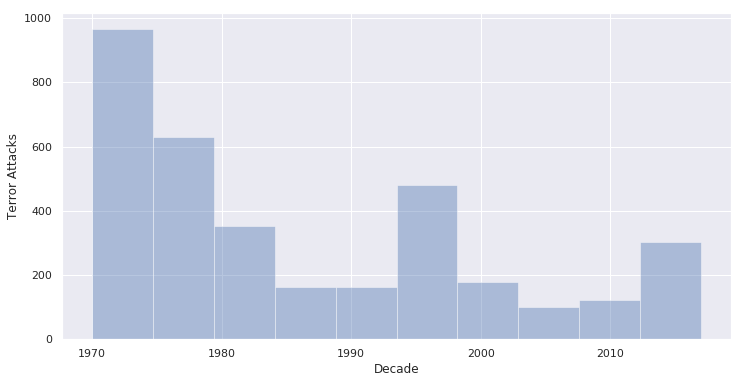

In [48]:
north_america_df = df.loc[df['region_txt']=='North America']
decades = north_america_df['iyear'].values
width=12
height=6
plt.close()

figure(figsize=(width,height))
min_year = decades.min()
max_year = decades.max()

ax = sns.distplot(decades,kde=False,bins=np.arange(min_year,max_year+1,(max_year-min_year)/10))
ax.xaxis.set_ticks(np.arange(min_year,max_year+1,10))
ax.set_xlabel("Decade")
ax.set_ylabel("Terror Attacks")
plt.show()

#### 2. Plot the frequency of terrorist attacks from 1970 to 2017. Which year had the highest number of terrorist attacks? In that year, using another plot, find which continent experienced the most number of attacks?

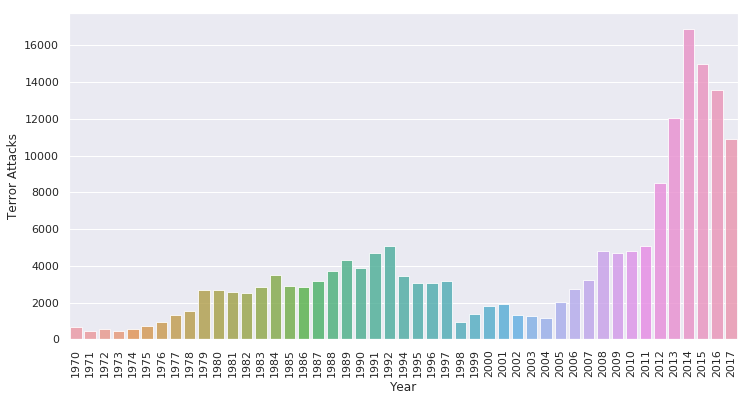

In [45]:
attacks = df.loc[(df['iyear']>=1970) & (df['iyear']<=2017)] 
year_count = attacks['iyear'].value_counts() 
width=12
height=6
plt.close()

figure(figsize=(width,height))

ax = sns.barplot(year_count.index, year_count.values, alpha=0.8)
ax.set_xlabel("Year")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel("Terror Attacks")
plt.show()

#### Observation:
* Year **2014** experienced the most number of terrorist attacks.

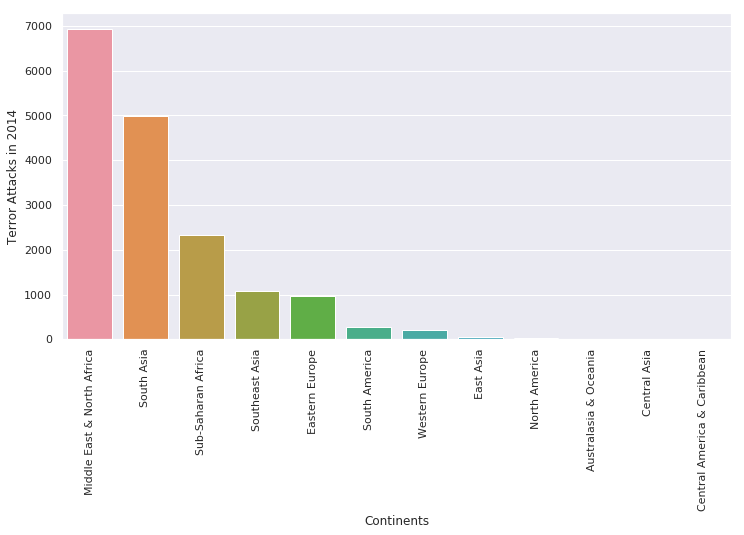

In [60]:
attacks = df.loc[df['iyear']==2014] 
continent_count = attacks['region_txt'].value_counts() 
width=12
height=6
plt.close()

figure(figsize=(width,height))

ax = sns.barplot(continent_count.index, continent_count.values,alpha=1)
ax.set_xlabel("Continents")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_ylabel("Terror Attacks in 2014")
plt.show()

#### Observation:

* **Middle East** and **North Africa** faced the largest number of terrorist attacks in **2014**. The count is around **6900** attacks in all.

#### 3. Generate word clouds (after removing dates and stop words) for the summary and motive for all the terrorist attacks. Explain the most popular reasons and descriptions for attacks using these two word clouds.

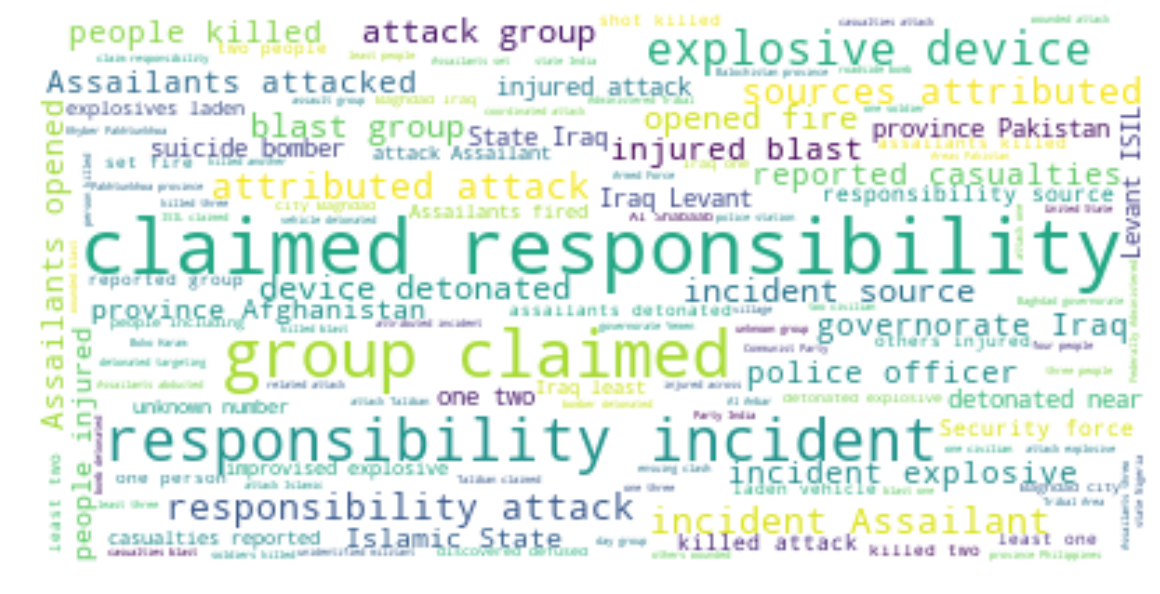

In [78]:
comment_words = ' '
stopwords = set(STOPWORDS) 
width=20
height=20
figure(figsize=(width,height))


summary=df['summary']
summary.dropna(inplace=True)
summary
text=""
for txt in summary:
    if ":" in txt:
        text+=txt.split(":")[1]
    

    
wordcloud = WordCloud(background_color="white",mode="RGBA",stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

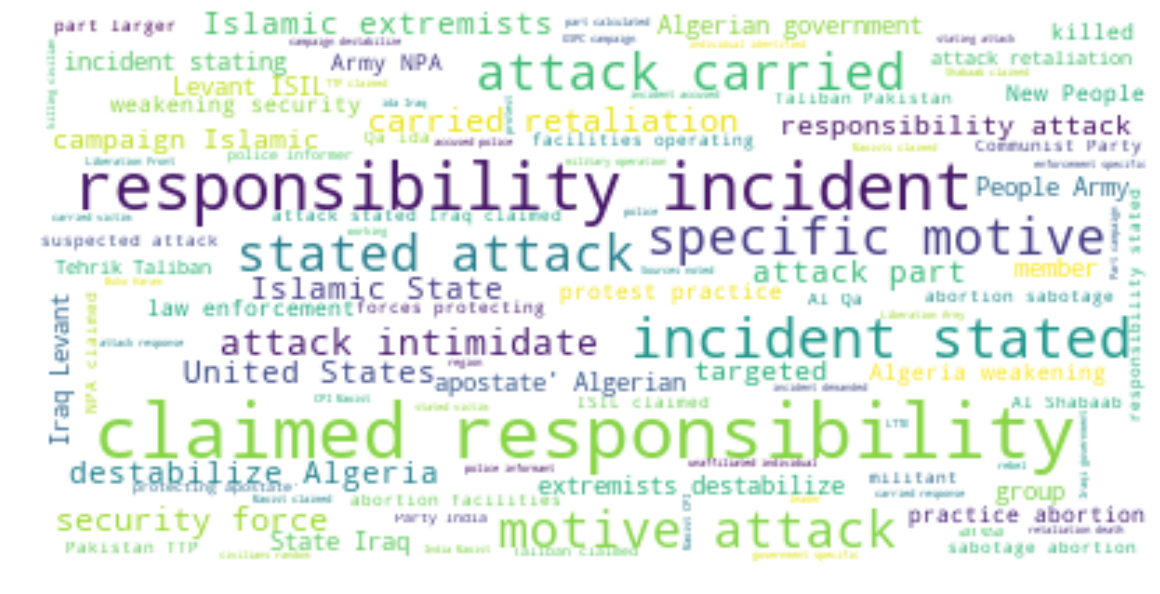

In [77]:
comment_words = ' '
stopwords = set(STOPWORDS) 
width=20
height=20
figure(figsize=(width,height))


motive=df['motive']
motive.dropna(inplace=True)

text=""
for txt in motive:
    if "unknown" not in txt:
        text+=txt

    
wordcloud = WordCloud(background_color="white",mode="RGBA", stopwords=stopwords).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Observations:

* The motive behind the attack from the above word clouds can be inferred as being 

#### 4. Construct an undirected graph in which two terrorist attacks have an edge between them if they are related. Using this graph, find the total number of coordinated terror attacks, i.e., the total number of strongly connected components. Also, find the largest set of coordinated terror attacks recorded.

In [1]:
related_attacks_df = pd.DataFrame(df, columns = ['eventid','related'])

G = nx.DiGraph()

for event_id in related_attacks_df['eventid']:
    G.add_node(i)

for i,j in zip(related_attacks_df['eventid'],related_attacks_df['related']):
    if type(j) is str:
        list1=j.split(",")
        for k in list1:
            k=k.replace(' ','')
            k=k.replace('\\','')
            k=k.replace("and",'')
            G.add_edge(i,int(k))
print(number_strongly_connected_components(G))
largest_cc = max(nx.strongly_connected_components(G), key=len)
print(len(largest_cc))

NameError: name 'pd' is not defined